In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data and Inspect

In [2]:
observations = pd.read_csv("observations.csv")
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
observations.shape

(23296, 3)

In [6]:
species = pd.read_csv("species_info.csv")
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [7]:
species.shape

(5824, 4)

In [8]:
observations.park_name.nunique()

4

## Step 2: Distributions

In [17]:
oberservations_park = observations.groupby("park_name").sum().reset_index()
oberservations_park.head()

,park_name,observations
0,Bryce National Park,576025
1,Great Smoky Mountains National Park,431820
2,Yellowstone National Park,1443562
3,Yosemite National Park,863332


[Text(0, 0, 'Bryce National Park'),
 Text(0, 0, 'Great Smoky Mountains National Park'),
 Text(0, 0, 'Yellowstone National Park'),
 Text(0, 0, 'Yosemite National Park')]

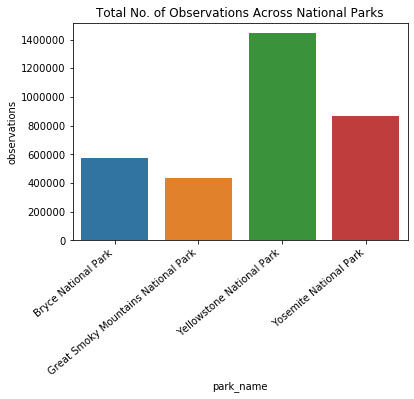

In [21]:
ax = sns.barplot(data=oberservations_park, x="park_name", y="observations")
plt.title("Total No. of Observations Across National Parks")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [22]:
species.category.nunique()

7

In [24]:
print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


In [29]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [30]:
print(f"number of conservation statuses:{species.conservation_status.nunique()}")
print(f"unique conservation statuses:{species.conservation_status.unique()}")

number of conservation statuses:4
unique conservation statuses:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [31]:
species.fillna('No Intervention', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

In [32]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention


In [36]:
conservation_status = species[species.conservation_status != "No Intervention"].groupby(["category", "conservation_status"])\
.count().reset_index()
conservation_status.head()

,category,conservation_status,scientific_name,common_names
0,Amphibian,Endangered,1,1
1,Amphibian,Species of Concern,4,4
2,Amphibian,Threatened,2,2
3,Bird,Endangered,4,4
4,Bird,In Recovery,3,3


In [39]:
conservation_pivot = conservation_status.pivot(index="category", columns="conservation_status", values="common_names")
conservation_pivot.head()

conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,1.0,NaN,4.0,2.0
Bird,4.0,3.0,72.0,NaN
Fish,3.0,NaN,4.0,4.0
Mammal,7.0,1.0,28.0,2.0
Nonvascular Plant,NaN,NaN,5.0,NaN


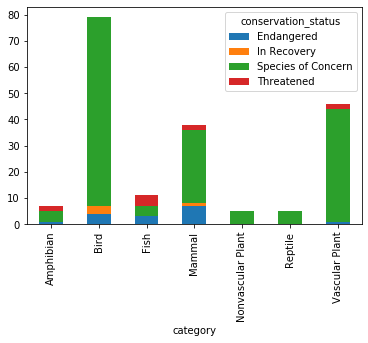

In [40]:
ax = conservation_pivot.plot(kind="bar", stacked=True)

In [41]:
species['is_protected'] = species.conservation_status != 'No Intervention'

In [42]:
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


In [61]:
category = species.groupby(["category", "is_protected"]).scientific_name.nunique().reset_index()\
    .pivot(index="category", columns="is_protected", values="scientific_name").reset_index()
category.columns = ['category', 'not_protected', 'protected']
category.head()

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5


In [71]:
category["percent_protected"] = np.around(100*category.protected/(category.protected+category.not_protected))
category.head(10)

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,9.0
1,Bird,413,75,15.0
2,Fish,115,11,9.0
3,Mammal,146,30,17.0
4,Nonvascular Plant,328,5,2.0
5,Reptile,73,5,6.0
6,Vascular Plant,4216,46,1.0


In [66]:
## Chi Contigency to deterrrmine if there is significatn diference between protection rates of different species

In [68]:
from scipy.stats import chi2_contingency

In [69]:
##Between Mammals and Fish
contingency1 = [[30, 146], [11, 115]]
chi2_contingency(contingency1)

(3.647651024981415, 0.0561483484489001, 1, array([[ 23.89403974, 152.10596026],
        [ 17.10596026, 108.89403974]]))

p -value above 0.05, not significant

In [73]:
##Between mammals and reptiles
contingency2 = [[5, 73], [30, 146]]
chi2_contingency(contingency2)

(4.289183096203645, 0.03835559022969898, 1, array([[ 10.7480315,  67.2519685],
        [ 24.2519685, 151.7480315]]))

p-value is less than 0.05, showing mammals statistivally more likely to need protection than reptiles

## Analysis of bat species

In [74]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)

In [75]:
species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


In [76]:
bats = species[species.is_bat]

In [77]:
bats.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True


In [78]:
bat_observations = bats.merge(observations)

In [80]:
bat_observations.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_bat,park_name,observations
0,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True,Yosemite National Park,188
1,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True,Great Smoky Mountains National Park,80
2,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True,Bryce National Park,57
3,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True,Yellowstone National Park,259
4,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True,Yellowstone National Park,227
5,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True,Bryce National Park,112
6,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True,Great Smoky Mountains National Park,59
7,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True,Yosemite National Park,130
8,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True,Yosemite National Park,124
9,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True,Great Smoky Mountains National Park,87


In [84]:
obs_by_park = bat_observations.groupby(["park_name", "is_protected"]).observations.sum().reset_index()

In [85]:
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


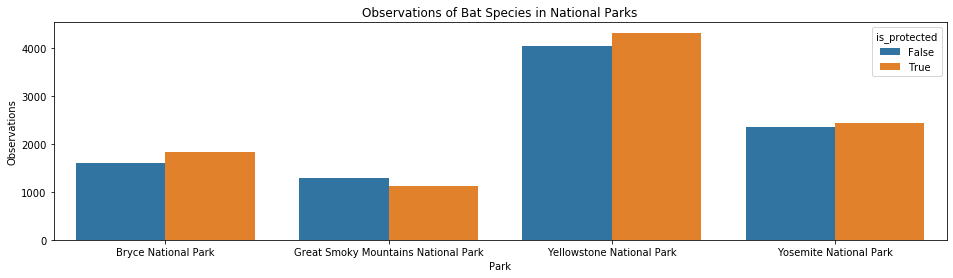

In [97]:
plt.figure(figsize=(16, 4))
x = sns.barplot(data=obs_by_park, x="park_name", y="observations", hue="is_protected")
plt.xlabel("Park")
plt.ylabel("Observations")
plt.title("Observations of Bat Species in National Parks")
#plt.xticks(rotation=30)
ax.set_xticks(range(4))
